### Análisis descriptivo exploratorio

#### **1. Importación de Librerías**

In [28]:
##Cargar librerías de base pip install nombrelibreria - terminal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **2. Funciones**

In [48]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

## Numérico = Media o Mediana (NAN) - Histograma(Numerica) - Mediana - Forma de Campana(Media)
## Categórico o Texto = Moda (Valor mas se repite) // SMOTE (Genera data sintética)
def histoplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##Función para Imputación de datos NAN con la media o mediana
def imputacionNA(df, nomCol, param):
    if param == 'media':
        df[nomCol]= df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol]= df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]

## Función para revisar datos Categóricos
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

##Función de reemplazo con base en patrón
def imputCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol]== busqueda, reempl, df[nomCol])
    return df[nomCol]

##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

##Función para cambiar de texto a numero variable
def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

##Funcion para binarizar variables categóricas 2 opciones
def cambTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol]==busqueda, camuno, camdos)
    return df[nomCol]

##Función para One Hot Encoder o Variables dummies
def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

##Función cambiar encabezados
def cambEncab(df, ListaN):
    df.columns = ListaN
    return df

##Funcion de extracción
def export(df, nombre, sepa, indice):
    data = df.to_csv(nombre, sep=sepa, index= indice)
    return data

#### **3. Llamado a Funciones**

In [30]:
data = importDatos('./Datasets/', 'CovidDiagnosis', '.xlsx')

data.head()

,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36°,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38,NO,0.0,Medilaser,negative
2,65.0,NaN,36C,YES,1.0,Carmen Emilia,negative
3,78.0,NaN,39,NOP,1.0,Moncaleano,negative
4,41.0,Masculino,40.,SI,0.0,Medilaser,positive


In [31]:
## Revisión de datos NAN
datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 49
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          3
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          7
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 46
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          7
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


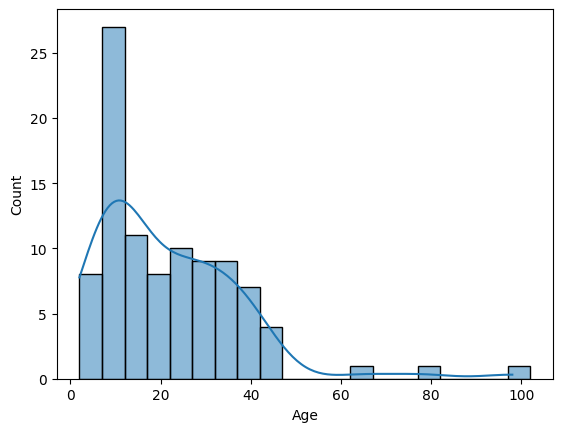

In [32]:
histoplot(data, 'Age', 5) # Reemplazan los datos NAN con la mediana

data['Age'] = imputacionNA(data, 'Age', 'mediana')

datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 39
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


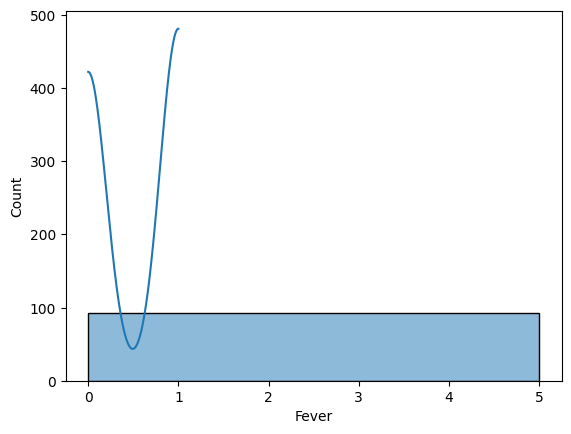

In [33]:
histoplot(data, 'Fever', 5)

data['Fever'] = imputacionNA(data, 'Fever', 'mediana')

datos_NAN(data)

In [34]:
## Revisión de datos categóricos
revCategoricos(data, 'Gender')

data['Gender'] = imputCat(data, 'Gender','Masculinoooo','Masculino')
data['Gender'] = imputCat(data, 'Gender','femenino','Femenino')
data['Gender'] = imputCat(data, 'Gender','Masculino…..//','Masculino')
data['Gender'] = imputCat(data, 'Gender','masculino','Masculino')

revCategoricos(data, 'Gender')

Femenino     65
Masculino    31
Name: Gender, dtype: int64

In [35]:
revCategoricos(data, 'Headache')

data['Headache'] = imputCat(data, 'Headache','NOP','NO')
data['Headache'] = imputCat(data, 'Headache','YES','SI')
data['Headache'] = imputCat(data, 'Headache','SI ','SI')
data['Headache'] = imputCat(data, 'Headache','OUI','SI')

revCategoricos(data, 'Headache')

SI    36
NO    28
Name: Headache, dtype: int64

In [36]:
data['Gender'] = imputacionCatNA(data, 'Gender')
data['Headache'] = imputacionCatNA(data, 'Headache')

datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 1
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           2          0
                             Temperature     object          30          1
                                Headache     object           2          0
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


In [37]:
## Revision de temperatura
data['Temperature'] = imputCat(data, 'Temperature','36C','36')
data['Temperature'] = imputCat(data, 'Temperature','36°','36')

### No hagan conversiones de datos con Inconsistencias o datos NAN - Borrar Datos NAN
datos = data

In [38]:
##Modificación de Temperatura a float64
datos['Temperature'] = cambioTextNum(datos, 'Temperature','float64')

datos_NAN(datos)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 1
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           2          0
                             Temperature    float64          27          1
                                Headache     object           2          0
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


In [39]:
datos['Temperature'].describe().T

count    98.000000
mean     34.839796
std       5.745468
min      23.410000
25%      30.670000
50%      36.350000
75%      39.000000
max      45.000000
Name: Temperature, dtype: float64

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           2          0
                             Temperature    float64          28          0
                                Headache     object           2          0
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


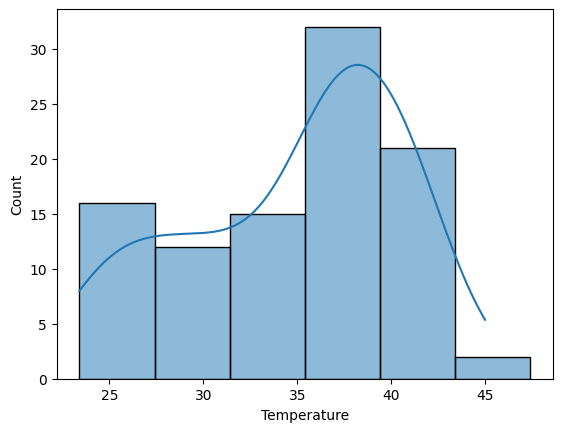

In [40]:
##Reemplazo del dato NAN en temperatura
histoplot(datos, 'Temperature', 4)

datos['Temperature'] = imputacionNA(datos, 'Temperature','mediana')

datos_NAN(datos)

In [41]:
##Cambiar de 1 a 0 covidDiagnosis, Headache, Gender
datos['Gender'] = cambTextBi(datos, 'Gender','Femenino', 0, 1)
datos['Headache'] = cambTextBi(datos, 'Headache','NO', 0, 1)
datos['CovidDiagnosis'] = cambTextBi(datos, 'CovidDiagnosis','negative', 0, 1)

datos_NAN(datos)

datos.head()

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender      int32           2          0
                             Temperature    float64          28          0
                                Headache      int32           2          0
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis      int32           2          0


,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,1,36.0,1,1.0,Moncaleano,1
1,35.0,0,38.0,0,0.0,Medilaser,0
2,65.0,0,36.0,1,1.0,Carmen Emilia,0
3,78.0,0,39.0,0,1.0,Moncaleano,0
4,41.0,1,40.0,1,0.0,Medilaser,1


In [42]:
revCategoricos(datos, 'Hospital')

Moncaleano       33
Medilaser        33
Carmen Emilia    33
Name: Hospital, dtype: int64

In [43]:
##Label encoder
#from sklearn import preprocessing

#label_e = preprocessing.LabelEncoder()

#datos['Hospital'] = label_e.fit_transform(datos['Hospital'])

#revCategoricos(datos, 'Hospital')

In [44]:
dataF = convDummies(datos, 'Hospital')

dataF.head()


,Age,Gender,Temperature,Headache,Fever,CovidDiagnosis,Carmen Emilia,Medilaser,Moncaleano
0,12.0,1,36.0,1,1.0,1,0,0,1
1,35.0,0,38.0,0,0.0,0,0,1,0
2,65.0,0,36.0,1,1.0,0,1,0,0
3,78.0,0,39.0,0,1.0,0,0,0,1
4,41.0,1,40.0,1,0.0,1,0,1,0


In [46]:
##Cambiar encabezados

dataF =cambEncab(dataF, ['Edad','Genero','Temp','DolorCa','Fiebre','CovidD','CarmenE','MediL','MoncaL'])

dataF.head()

,Edad,Genero,Temp,DolorCa,Fiebre,CovidD,CarmenE,MediL,MoncaL
0,12.0,1,36.0,1,1.0,1,0,0,1
1,35.0,0,38.0,0,0.0,0,0,1,0
2,65.0,0,36.0,1,1.0,0,1,0,0
3,78.0,0,39.0,0,1.0,0,0,0,1
4,41.0,1,40.0,1,0.0,1,0,1,0


In [47]:
dataF.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,99.0,21.555556,15.882362,2.00,10.00,18.00,30.5,98.0
Genero,99.0,0.313131,0.466127,0.00,0.00,0.00,1.0,1.0
Temp,99.0,34.855051,5.718094,23.41,30.67,36.35,39.0,45.0
DolorCa,99.0,0.717172,0.452666,0.00,0.00,1.00,1.0,1.0
Fiebre,99.0,0.565657,0.498193,0.00,0.00,1.00,1.0,1.0
CovidD,99.0,0.393939,0.491108,0.00,0.00,0.00,1.0,1.0
CarmenE,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0
MediL,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0
MoncaL,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0


In [49]:
##Exportar la data .csv
export(dataF, 'dataLimpia.csv',',', False)